In [1]:
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from databroker import Broker

from bluesky.callbacks.best_effort import BestEffortCallback

from apstools.devices import use_EPICS_scaler_channels

In [2]:
db = Broker.named("mongodb_config")
RE = RunEngine({})
RE.subscribe(db.insert)

m1 = EpicsMotor("vm7:m1", name="m1")
scaler = ScalerCH("vm7:scaler1", name="scaler")

In [3]:
scaler.channels.chan01.chname.put("clock")
scaler.channels.chan02.chname.put("I0")
scaler.channels.chan03.chname.put("scint")

scaler.preset_time.put(0.4)

scaler.match_names()
use_EPICS_scaler_channels(scaler)
scaler.read()

OrderedDict([('clock', {'value': 5000000.0, 'timestamp': 1550617798.453733}),
             ('I0', {'value': 4.0, 'timestamp': 1550617798.453733}),
             ('scint', {'value': 1.0, 'timestamp': 1550617798.453733}),
             ('scaler_time', {'value': 0.5, 'timestamp': 1550617798.453733})])

Transient Scan ID: 1     Time: 2019/02/19 17:11:20
Persistent Unique Scan ID: '225eef4b-4a56-427b-b507-e959b216a9f4'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


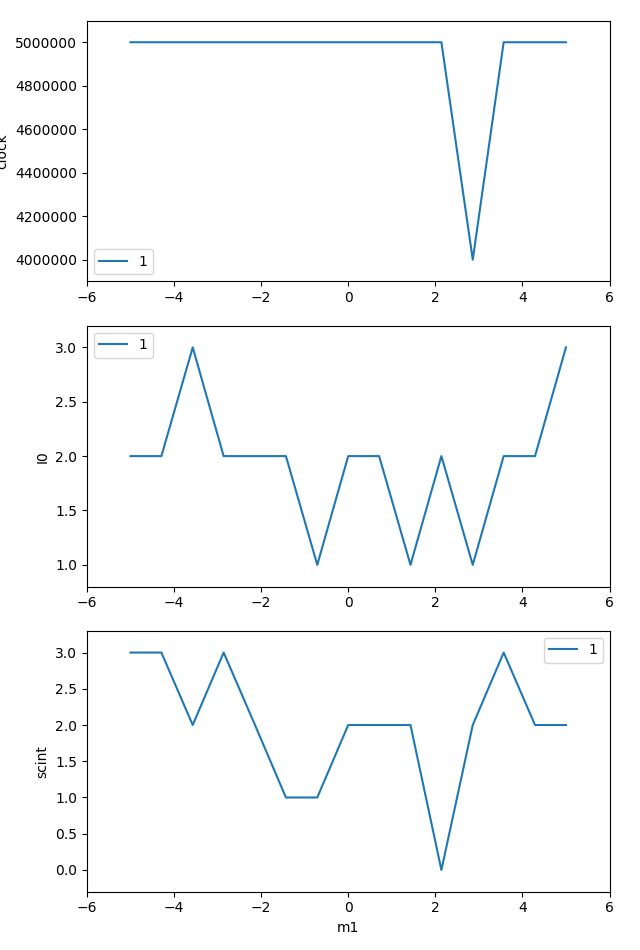

|         1 | 17:11:25.8 |   -5.00000 |    5000000 |          2 |          3 |
|         2 | 17:11:27.5 |   -4.29000 |    5000000 |          2 |          3 |
|         3 | 17:11:29.1 |   -3.57000 |    5000000 |          3 |          2 |
|         4 | 17:11:30.7 |   -2.86000 |    5000000 |          2 |          3 |
|         5 | 17:11:32.3 |   -2.14000 |    5000000 |          2 |          2 |
|         6 | 17:11:33.9 |   -1.43000 |    5000000 |          2 |          1 |
|         7 | 17:11:35.5 |   -0.71000 |    5000000 |          1 |          1 |
|         8 | 17:11:37.2 |    0.00000 |    5000000 |          2 |          2 |
|         9 | 17:11:39.0 |    0.71000 |    5000000 |          2 |          2 |
|        10 | 17:11:40.6 |    1.43000 |    5000000 |          1 |          2 |
|        11 | 17:11:42.3 |    2.14000 |    5000000 |          2 |          0 |
|        12 | 17:11:44.1 |    2.86000 |    4000000 |          1 |          2 |
|        13 | 17:11:45.7 |    3.57000 |    5000000 |

('225eef4b-4a56-427b-b507-e959b216a9f4',)

In [4]:
RE(bp.scan([scaler], m1, -5, 5, 15), BestEffortCallback())